In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Step 2 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26521/117856/'>link</a>
<br/>Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [4]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [12]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [8]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [14]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [15]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [17]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

Step 3 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26521/117857/'>link</a>
<br/>Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

12, 123, 456

In [55]:
group = logs.groupby(by=['client']).agg({'success':'sum'})

max_success = group.success.max()

group[group.success == max_success].index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

Step 4 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26521/117858/'>link</a>
<br/>С какой платформы осуществляется наибольшее количество успешных операций?

In [65]:
logs.groupby(by='platform').agg({'success':'sum'}).success.sort_values(ascending=False).head(1)

platform
phone    2019
Name: success, dtype: int64

Step 5 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26521/117859/'>link</a>
<br/>Какая платформа наиболее популярна среди премиумных клиентов?

In [71]:
user_data \
    .query('premium == True') \
    .merge(logs, on='client') \
    .platform.value_counts().sort_values(ascending=False).head(1)

phone    246
Name: platform, dtype: int64

Step 6 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26521/117860/'>link</a>
<br/>Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

Используйте датасэт, который вы получили на предыдущем шаге
<img src='https://ucarecdn.com/6312cd54-c828-4712-a002-b0a895159f61/'/>

In [97]:
premium_true = user_data[user_data.premium == True]
premium_false = user_data[user_data.premium == False]

<AxesSubplot:xlabel='age', ylabel='Density'>

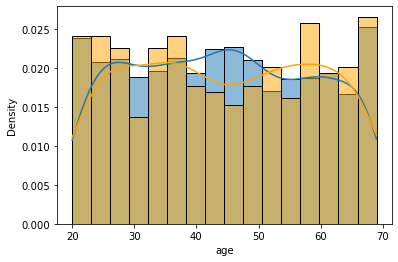

In [131]:
fig, ax = plt.subplots()
bins = 16
sns.histplot(premium_false.age, cbar_ax=ax, kde=True, common_norm=False, stat="density", bins=bins)
sns.histplot(premium_true.age, cbar_ax=ax, kde=True, common_norm=False, stat="density", color='orange', bins=bins)

#sns.rugplot(premium_false.age, ax=ax)
#sns.rugplot(premium_true.age, ax=ax)

Step 7 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26521/117861/'>link</a>
<br/>Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших столько успешных операций

In [148]:
group_by_success = logs.groupby(by='client') \
    .agg({'success':'sum'})

<AxesSubplot:>

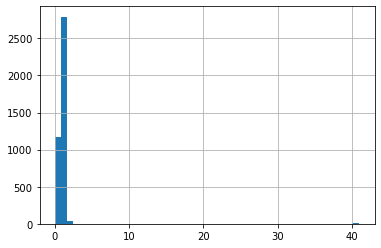

In [152]:
#1
group_by_success.success.hist(bins=50)


<AxesSubplot:xlabel='success', ylabel='Count'>

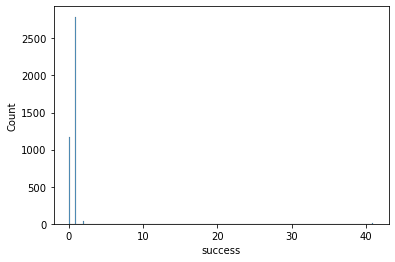

In [154]:
#2
sns.histplot(group_by_success.success)

Step 8 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9040/26521/117862/'>link</a>
<br/>⭐️Задание со звёздочкой!⭐️

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

Полезные ссылки:

sns.countplot – документация к типу графика
figsize – про размер графиков
Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

In [159]:
joined = user_data.merge(logs, on='client').query('success == True')

#group_by_age = joined.groupby(by='age', as_index= False) \
#    .agg({'success':'sum'}) \
#    .sort_values('age')

<AxesSubplot:xlabel='age', ylabel='count'>

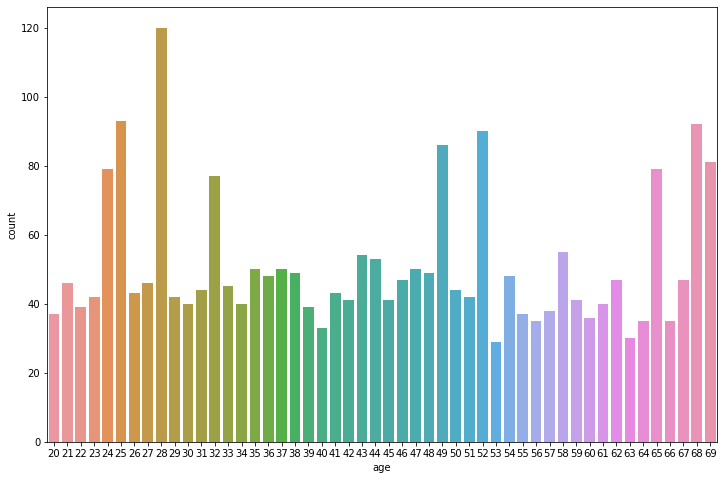

In [161]:
plt.figure(figsize=(12,8))
sns.countplot(data=joined, x='age')